## **1. Import libraries**

In [ ]:
!gdown 1TAgJOeN8c5AIeIPmFIqtXYTreXp_h9EL

Downloading...
From: https://drive.google.com/uc?id=1TAgJOeN8c5AIeIPmFIqtXYTreXp_h9EL
To: /content/iris_2D.csv
100% 102/102 [00:00<00:00, 280kB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Read data**

In [ ]:
data = pd.read_csv('/content/iris_2D.csv')
data.head()

,Petal_Length,Petal_Width,Label
0,1.4,0.2,0.0
1,1.3,0.4,0.0
2,1.4,0.3,0.0
3,4.0,1.0,1.0
4,4.7,1.4,1.0


### **Prepare data**

In [ ]:
x_data = data[['Petal_Length', 'Petal_Width']]
x_data.iloc[[1, 5], [0, 1]]


,Petal_Length,Petal_Width
1,1.3,0.4
5,3.6,1.3


In [ ]:
x_data = data[['Petal_Length', 'Petal_Width']].to_numpy()

for i in range(len(x_data)):
    print(f"Point {i}: {x_data[i]}")

Point 0: [1.4 0.2]
Point 1: [1.3 0.4]
Point 2: [1.4 0.3]
Point 3: [4. 1.]
Point 4: [4.7 1.4]
Point 5: [3.6 1.3]


In [ ]:
print(x_data)

[[1.4 0.2]
 [1.3 0.4]
 [1.4 0.3]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]]


In [ ]:
type(x_data)

numpy.ndarray

In [ ]:
x_data.shape

(6, 2)

In [ ]:
y_data = data['Label'].to_numpy()

for i in range(len(y_data)):
    print(f"Label of point {i}: {y_data[i]}")

Label of point 0: 0.0
Label of point 1: 0.0
Label of point 2: 0.0
Label of point 3: 1.0
Label of point 4: 1.0
Label of point 5: 1.0


In [ ]:
y_data

array([0., 0., 0., 1., 1., 1.])

In [ ]:
y_data.shape

(6,)

In [ ]:
type(y_data)

numpy.ndarray

In [ ]:
x_test = np.array([2.4, 0.8])
x_test

array([2.4, 0.8])

In [ ]:
x_test.shape

(2,)

In [ ]:
  x_test = np.array([2.4, 0.8])
  x_test = x_test.reshape(1, 2)

  print(f"Test point: {x_test}")

Test point: [[2.4 0.8]]


In [ ]:
x_test.shape

(1, 2)

##  **3. Implement KNN**

#### Compute distances

In [ ]:
check = np.sum((x_data - x_test)**2, axis = 0)
check

array([12.5 ,  1.42])

In [ ]:
distances = np.sqrt(np.sum((x_data - x_test)**2, axis=1))

for i in range(len(distances)):
    print(f"Distance from point {i} to test point: {distances[i]:.4f}")

Distance from point 0 to test point: 1.1662
Distance from point 1 to test point: 1.1705
Distance from point 2 to test point: 1.1180
Distance from point 3 to test point: 1.6125
Distance from point 4 to test point: 2.3770
Distance from point 5 to test point: 1.3000


#### Sort the distances

In [ ]:
sort_distances = np.argsort(distances)

### WRITE YOUR CODE HERE


print(f"Indices of points sorted by distance: {sort_distances}")

Indices of points sorted by distance: [2 0 1 5 3 4]


#### Get the top k nearest neighbors

In [ ]:
k = 4
top_k = sort_distances[:k]

### WRITE YOUR CODE HERE

print(f"Top {k} nearest neighbors: {top_k}")

Top 4 nearest neighbors: [2 0 1 5]


#### Vote for the class

In [ ]:
y_data[top_k]

array([0., 0., 0., 1.])

In [ ]:
from collections import Counter
counter = Counter(y_data[top_k])
print(counter)
print(counter.most_common(2)[0][1])

Counter({np.float64(0.0): 3, np.float64(1.0): 1})
3


In [ ]:
from collections import Counter

counter = Counter(y_data[top_k])
predicted_label = counter.most_common(1)[0][0]

print(f"The predicted label is {predicted_label}")


The predicted label is 0.0


## **4. Visualization**

In [ ]:
nearest_neighbors = x_data[top_k]
print(nearest_neighbors)

[[1.4 0.3]
 [1.4 0.2]
 [1.3 0.4]
 [3.6 1.3]]


In [ ]:
x_data

array([[1.4, 0.2],
       [1.3, 0.4],
       [1.4, 0.3],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3]])

In [ ]:
label = 1
mask = (y_data == label)
print(mask)
x_data[mask, 1]

[False False False  True  True  True]


array([1. , 1.4, 1.3])

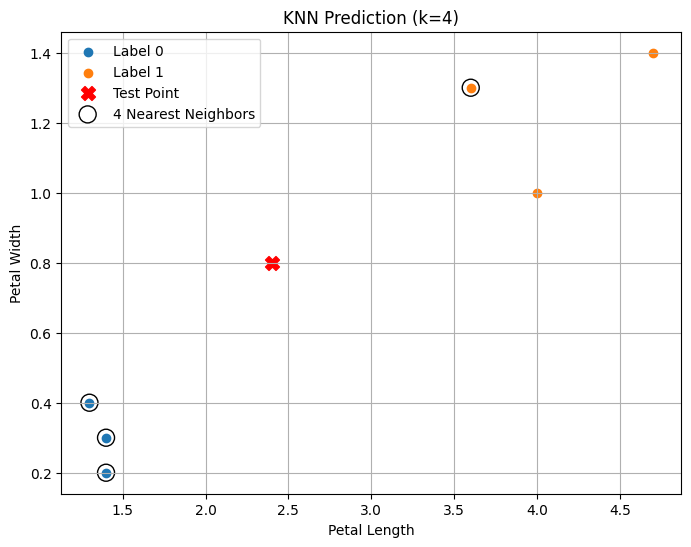

In [ ]:
nearest_neighbors = x_data[top_k]

plt.figure(figsize=(8, 6))
for label in np.unique(y_data):
    mask = (y_data == label)
    plt.scatter(x_data[mask, 0], x_data[mask, 1], label=f'Label {int(label)}')

plt.scatter(x_test[0, 0], x_test[0, 1], c='red', marker='X', s=100, label='Test Point')
plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1],
            facecolors='none', edgecolors='black', s=150, label=f'{k} Nearest Neighbors')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f'KNN Prediction (k={k})')
plt.legend()
plt.grid(True)
plt.show()